# Data Chellenge lightcurves info 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import os
import pandas as pd
import random
import scipy.optimize as opt
from scipy.interpolate import interp1d
from Common_functions import *

%matplotlib inline

In [3]:
def fun (t,t0,u0,tE,base):
    u = np.sqrt(u0**2+((t-t0)/tE)**2)
    A = ((u**2)+2)/(u*np.sqrt(u**2+4))
    return base- 2.5*np.log10(A)

In [4]:
home = os.path.expanduser("~")

In [5]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [27]:
# Set up te directory where all microlensing data challenge lightcurves are

temp = home+'/Library/Mobile Documents/com~apple~CloudDocs/Microlensing_Data_Challeng/data-challenge-1/lc/'
direc = os.listdir(temp)

In [28]:
# Reading in the answer key file for data challenge

answers_direc= home+'/Library/Mobile Documents/com~apple~CloudDocs/Microlensing_Data_Challeng/data-challenge-1/Answers'

In [29]:
link = answers_direc+'/master_file.txt'
f= open(link,"r")

print (f.readlines()[0].split(' ')[78])
#print (f.readlines()[1].split(' '))[78]

DL


In [9]:
(' ')[76]

IndexError: string index out of range

In [13]:
link = answers_direc+'/master_file.txt'
f= open(link,"r")

#print (f.readlines()[1].split('|'))[3]
print ((f.readlines()[1].split('|'))[8].split(' ')[2])


0.337147


In [51]:
# Reading in the answer key file for data challenge

link = answers_direc+'/master_file.txt'
f= open(link,"r")
info = [[],[],[],[],[],[], [], [], [], []]
c=0

for line in f.readlines():
    
     
    c=c+1
    
    
    # saving type
    if line.split(' ')[76]=='dccv': #Cataclysmic Variables
        info[0].append(0)
    elif line.split(' ')[78]=='ombin': #Binary-lens
        info[0].append(1)
    elif line.split(' ')[78]=='omcassan': #Planetary-lens
        info[0].append(2)
    elif len(line.split(' '))>92 and line.split(' ')[92]=='dcnormffp': #PSPL/FFP
        info[0].append(3)
    else:
        info[0].append('')
        
    # saving rho
    info[1].append(line.split('|')[3].split(' ')[8])
    
    # saving tE
    info[2].append(line.split('|')[3].split(' ')[4])
    
    # saving t0
    info[3].append(line.split('|')[3].split(' ')[3])
    
    #saving index
    info[4].append(c)
    
    # saving u0
    info[5].append(line.split('|')[3].split(' ')[1])
    
    #saving q
    info[6].append(line.split('|')[4].split(' ')[5])
    
    #saving s
    info[7].append(line.split('|')[4].split(' ')[6])
    
    #saving mL
    info[8].append(line.split('|')[4].split(' ')[3])
    
    #saving mp
    info[9].append(line.split('|')[4].split(' ')[1])
    

In [52]:
name = []
for counter, value in enumerate(info[0]):

    if counter<10:
        name.append('ulwdc1_00'+str(counter)+'_W149.txt')
    elif (counter>9) & (counter<100):
        name.append('ulwdc1_0'+str(counter)+'_W149.txt')
    else:
        name.append('ulwdc1_'+str(counter)+'_W149.txt')
    

In [53]:
df = pd.DataFrame({'name': name, 't0':info[3], 'rho': info[1], 'tE': info[2], 'type':info[0], 'index':info[4], 'u0': info[5], 'q':info[6], 's':info[7]})

In [54]:
# df.to_csv('small_dataset_info.csv')

In [55]:
df[df.index==1]

,index,name,q,rho,s,t0,tE,type,u0
1,2,ulwdc1_001_W149.txt,0.000267075,0.158284,45.5602,1767.01716721,0.0864145,0,0.234453


In [57]:
for counter, value in enumerate(info[0]):
    if value == 0:
        print(counter,name[counter], value, info[1][counter], info[2][counter],info[3][counter],info[5][counter])
        

1 ulwdc1_001_W149.txt 0 0.158284 0.0864145 1767.01716721 0.234453
3 ulwdc1_003_W149.txt 0 0.0363199 0.299024 523.762571812 -0.530593
7 ulwdc1_007_W149.txt 0 0.0644367 0.376711 515.980855823 -0.632731
10 ulwdc1_010_W149.txt 0 0.0161338 0.340629 501.317970604 -0.801512
11 ulwdc1_011_W149.txt 0 0.00301356 1.79864 1398.10311198 0.255116
13 ulwdc1_013_W149.txt 0 0.00236214 1.71325 1636.31613493 -0.0761741
15 ulwdc1_015_W149.txt 0 0.0491172 0.494798 1640.10701537 -0.355046
16 ulwdc1_016_W149.txt 0 0.00303882 6.14771 546.427345276 -0.654962
19 ulwdc1_019_W149.txt 0 0.0120158 0.273079 165.386803597 -0.033205
23 ulwdc1_023_W149.txt 0 0.0116641 0.232372 1397.31838703 -0.271711
24 ulwdc1_024_W149.txt 0 0.0176152 1.89652 360.865802318 -0.64254
26 ulwdc1_026_W149.txt 0 0.00323606 1.56653 1421.89729035 0.624132
30 ulwdc1_030_W149.txt 0 0.0602295 0.217997 1452.42788315 -0.429354
34 ulwdc1_034_W149.txt 0 0.166489 0.125473 1768.39684546 -0.965848
35 ulwdc1_035_W149.txt 0 0.00706149 0.70726 1621.6371059

In [190]:
# Reading in one single lightcurve

f = '/ulwdc1_106_W149.txt'
t,m,e = np.loadtxt(temp+f,unpack=True)

df = pd.DataFrame({'t': t, 'magnitude': m, 'm_err': e})
peaks = np.array([t[np.argmin(m)]])-2458000

In [191]:
interpol = interp1d(df['t'],df['magnitude'], kind='zero')

In [192]:
n_outliers, peaks = count_peaks (t, m, smooth='yes', bin_size = 75, threshold = 3)
print (len(peaks))

1


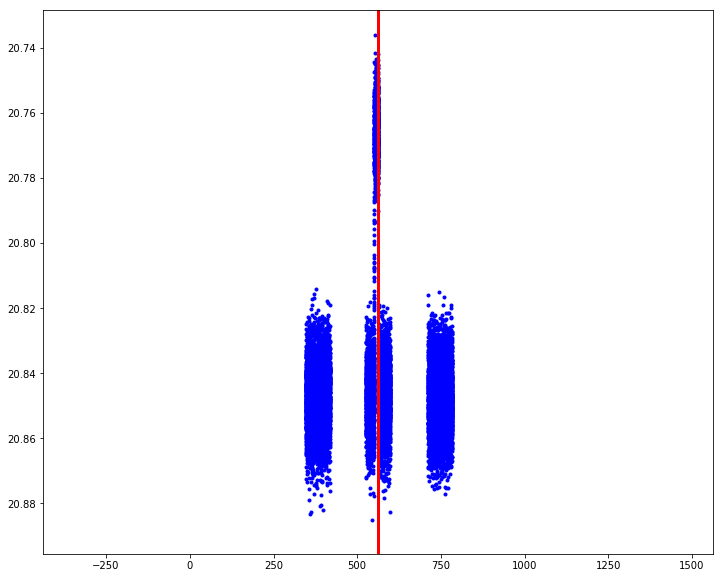

In [193]:
# Plotting one single light curve
# t = np.linspace(min(df['t']),max(df['t']),20000)

dt = 1000
plt.figure(1)
plt.plot(df['t']-2458000, interpol(df['t']),'b.')
#plt.plot(t-2458000, interpol(t),'r-')
plt.gca().invert_yaxis()

if len(peaks)==1:
    plt.axvline(peaks[0]-2458000,color='red', linewidth = 3)
    plt.xlim(peaks[0]-2458000-1*dt, peaks[0]-2458000+1*dt)
elif (len(peaks)>1):
    for i in peaks:
        plt.axvline(i-2458000, color='red', linewidth = 3)
    plt.xlim(peaks[0]-2458000-1*dt, peaks[0]-2458000+1*dt)
        
elif len(peaks) == 0:
    pass
    

fig = plt.gcf()
fig.set_size_inches(12.0,10.0)
#fig.savefig('Non-microlensing.png')

In [53]:
min(t)

2458346.505461

In [16]:
(df['t'][int(len(df))-1]-df['t'][0])/365

4.692427350685307

# Reading the larger dataset

In [16]:
temp2 = home+'/Library/Mobile Documents/com~apple~CloudDocs/Microlensing_Data_Challeng/data-challenge-1/alldclc/'#lc/'

In [17]:
name = 'omcassan'
dir_name = 'omcassan.160.NRO'
answers_direc2= home+'/Library/Mobile Documents/com~apple~CloudDocs/Microlensing_Data_Challeng/data-challenge-1/Answers/alllc_params/'+str(name)


In [20]:
link = answers_direc2+'/analysis/'+str(dir_name)
f= open(link,"r")

#print (f.readlines()[0].split('|'))
#print (f.readlines()[1].split(' '))[78]
temp =(f.readlines()[0].split('|'))[2].split(' ') 
print (temp)
#print ('mag.'+str(name)+'_'+temp[2]+'_'+temp[1]+'_'+temp[0]+'.det.lc.W149')

['', '9307', '7.214', '0.35', '-0.792245', '3.82068', '10', '5', '7.1', '9.085', '3920', '4.93', '0.328', '']


In [21]:
# Reading in the answer key file for data challenge

link = answers_direc2+'/analysis/'+str(dir_name)
f= open(link,"r")
info = [[],[],[],[],[],[], [], [], [], [], [],[], [], [], [],[], [], [], []]
c=0

for line in f.readlines():
    
     
    
#     saving index
#     info[0].append(c)
    
    #Saving name
    temp =(line.split('|'))[0].split(' ') 
    info[0].append('mag.'+str(name)+'_'+temp[1]+'_'+temp[2]+'_'+temp[0]+'.det.lc.W149')
    
    c=c+1
    
    # saving t0
    info[3].append(line.split('|')[3].split(' ')[3])
    
    # saving rho
    info[1].append(line.split('|')[3].split(' ')[8])
    
    # saving tE
    info[2].append(line.split('|')[3].split(' ')[4])
    
    # saving piE
    info[8].append(line.split('|')[3].split(' ')[7])
    
    # saving u0
    
    info[4].append(line.split('|')[3].split(' ')[1])
    
    # saving baseline magnitude
    
    info[5].append(line.split('|')[6].split(' ')[4])
    
    # saving q
    info[6].append(line.split('|')[4].split(' ')[5])
    
    # saving s
    info[7].append(line.split('|')[4].split(' ')[6])
    
    # saving mL in units of mSun
    info[9].append(line.split('|')[2].split(' ')[3])
    
    # saving dL in units of kpc
    info[10].append(line.split('|')[2].split(' ')[2])
    
    # saving alpha
    info[11].append(line.split('|')[3].split(' ')[2])
    
    # saving rE
    info[12].append(line.split('|')[3].split(' ')[5])

    # saving thetaE
    info[13].append(line.split('|')[3].split(' ')[6])
    
    # saving murel
    info[14].append(line.split('|')[3].split(' ')[9])
    
    # saving mp
    info[15].append(line.split('|')[4].split(' ')[1])
    
    # saving fs0
    info[16].append(line.split('|')[8].split(' ')[1])
    
    # saving fs1
    info[17].append(line.split('|')[8].split(' ')[1])
    
    # saving type
#     if line.split(' ')[76]=='dccv': #Cataclysmic Variables
#         info[0].append(0)
#     elif line.split(' ')[78]=='ombin': #Binary-lens
#         info[0].append(1)
#     elif line.split(' ')[78]=='omcassan': #Planetary-lens
#         info[0].append(2)
#     if len(line.split(' '))>92 and line.split(' ')[92]=='dcnormffp': #PSPL/FFP
#         info[0].append(3)
#     else:
#         info[0].append('')

In [22]:
df_info = pd.DataFrame({'name': np.array(info[0],dtype=str), 'rho': np.array(info[1],dtype=float), 
                        'tE': np.array(info[2],dtype=float), 't0': np.array(info[3],dtype=float), 
                        'u0': np.array(info[4],dtype=float),'base': np.array(info[5],dtype=float),
                        'q':np.array(info[6],dtype=float), 's': np.array(info[7],dtype=float),
                       'piE': np.array(info[8],dtype=float), 'mL': np.array(info[9],dtype=float),
                       'dL': np.array(info[10],dtype=float), 'alpha': np.array(info[11],dtype=float),
                       'rE': np.array(info[12],dtype=float), 'thetaE': np.array(info[13],dtype=float),
                       'murel': np.array(info[14],dtype=float), 'Mp': np.array(info[15],dtype=float),
                       'fs0': np.array(info[16], dtype=float), 'fs1': np.array(info[17], dtype=float)})


In [165]:
# frames = [df_info, df_info2]

# info = pd.concat(frames)

In [166]:
# info = info.reset_index()

In [23]:
# df_info.to_csv('answer_keys/'+str(name)+'.CSV')

In [25]:
df_info[df_info.name == 'mag.omcassan_0_22_526.det.lc.W149' ]

,Mp,alpha,base,dL,fs0,fs1,mL,murel,name,piE,q,rE,rho,s,t0,tE,thetaE,u0
20,0.000025,16.361,19.8491,9.305,0.624967,0.624967,0.2,1.45818,mag.omcassan_0_22_526.det.lc.W149,0.086704,0.000127,1.31457,0.011161,0.623442,311.407644,35.2199,0.141276,0.958763


In [386]:
for counter, value in enumerate(info[0]):
    if value == 3:
        print(counter, value, info[1][counter], info[2][counter],info[3][counter])
        

(3, 3, '0.2559', '0.15356', '1774.0108037')


In [387]:
# Free-floating candidates:
# ulwdc1_089_W149.txt
#

In [178]:
# Reading in one single lightcurve

f = 'mag.omcassan_0_32_977.det.lc.W149'
t,m,e = np.loadtxt(temp2+f,unpack=True, usecols=(0,1, 2))

df = pd.DataFrame({'t': t, 'magnitude': m, 'm_err': e})
peaks = np.array([t[np.argmin(m)]])-2458234

In [179]:
np.std(y-df['magnitude'])

0.159807692995435

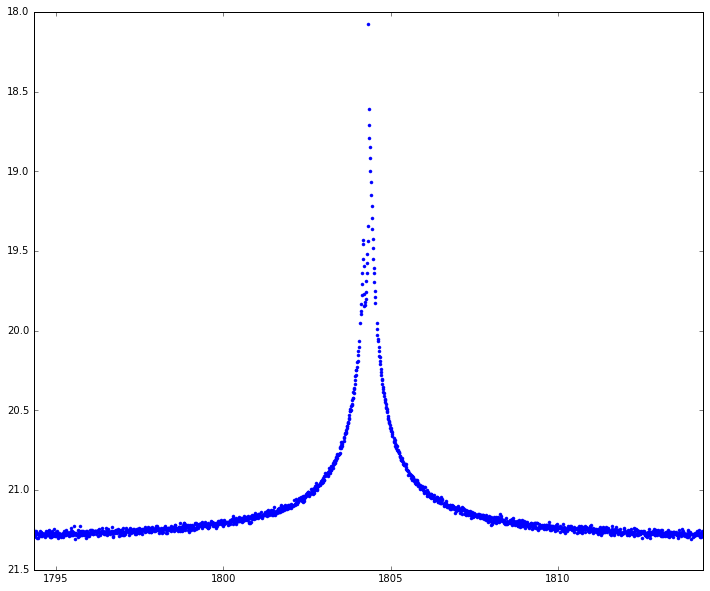

In [180]:
# Plotting one single light curve
dt = 5
plt.figure(1)
y = interp1d(df['t'],smooth(df['magnitude'],20), kind='next')(df['t'])

# plt.plot(df['t']- 2458234, y, 'b-')
plt.plot(df['t']- 2458234,  df['magnitude'], 'b.')
# plt.plot(df['t'][(df.t>157+2458234) & (df.t<157.4+2458234)]-2458234, y[(df.t>157+2458234) & (df.t<157.4+2458234)],'b.')
# plt.plot(df['t'][(df.t>157.3+2458234)]-2458234, smooth(y[(df.t>157.3+2458234)],5),'b-')
# plt.plot(df['t'][(df.t<157.1+2458234)][0:-8]-2458234, smooth(y[(df.t<157.1+2458234)],10)[0:-8],'b-')



#plt.plot(df['t']-2458000-peaks[0], fun(df['t']-2458000-peaks[0],0, 0.061569, 25.4193 , 20.129112),'r.')
# plt.ylim(19.2,20.6)
# print min(df['magnitude']), max(df['magnitude'])

plt.gca().invert_yaxis()
# plt.axvline(peaks[0])
plt.xlim(peaks[0]-2*dt, peaks[0]+2*dt)
# plt.xlim(510, 563)
fig = plt.gcf()
fig.set_size_inches(12.0,10.0)
#fig.savefig('Non-microlensing.png')

In [426]:
df_model = pd.read_csv('dcnormffp_0_82_1921_Cauchy_fitted.CSV')

In [704]:
max(t)

2460059.241444